In [1]:
import pandas as pd
from system_fns import ArticleEntityAnalysis
from system_fns import average_weighted_clustering_coefficient, average_centrality_metrics
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('business.csv')
df = df[['date', 'id', 'unique_entities']]
df['date'] = pd.to_datetime(df['date']).dt.date
df['unique_entities'] = [eval(l) for l in df['unique_entities']]
df = df.sort_values('date')
df.head()

,date,id,unique_entities
816,2023-01-01,2191765,"[Jaime Bautista, Bongbong Marcos, Manuel Tamay..."
815,2023-01-02,2191867,"[Manny Pangilinan, Jaime Bautista]"
814,2023-01-02,2192002,"[Jaime Bautista, Rodrigo Duterte, Manuel Tamay..."
811,2023-01-03,2192961,"[Bongbong Marcos, Rodrigo Duterte]"
813,2023-01-03,2192645,"[Ben Lee, Alidad Tash]"


In [3]:
print("Number of unique articles:", df['id'].nunique())
print("Earliest datetime record:", df['date'].min())
print("Latest datetime record:", df['date'].max())
df.dtypes

Number of unique articles: 817
Earliest datetime record: 2023-01-01
Latest datetime record: 2023-07-24


date               object
id                  int64
unique_entities    object
dtype: object

In [4]:
date_scope = (df['date'].max() - df['date'].min()).days + 1
date_scope

205

## distribution of centrality scores

In [5]:
conf = np.arange(1, 31)

cent_scores_groups = dict() 

for i in tqdm(conf):
    n = int(date_scope // i)

    whole = ArticleEntityAnalysis(df)
    central = whole.aggregate_rolling_window_analysis(
        function=average_centrality_metrics,
        window_panel=n,
        intersect=i,
        mean=False,
        kind='entity')

    cent_scores_groups[i] = central

  0%|          | 0/30 [00:00<?, ?it/s]

In [6]:
deg_groups = dict() 
betw_groups = dict() 
clo_groups = dict() 

for i in cent_scores_groups.keys():
    deg_scores_ts = list()
    betw_scores_ts = list()
    clo_scores_ts = list()
    
    for values in cent_scores_groups[i]:
        deg_scores_ts.append(values[0])
        betw_scores_ts.append(values[1])
        clo_scores_ts.append(values[2])

    deg_groups[i] = deg_scores_ts
    betw_groups[i] = betw_scores_ts
    clo_groups[i] = clo_scores_ts

/var/folders/tv/psypbvx97n74gbz8rcln8f8m0000gn/T/ipykernel_2744/1036845835.py:8: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  p_pairs.append(stats.ks_2samp(sample1, sample2).pvalue)


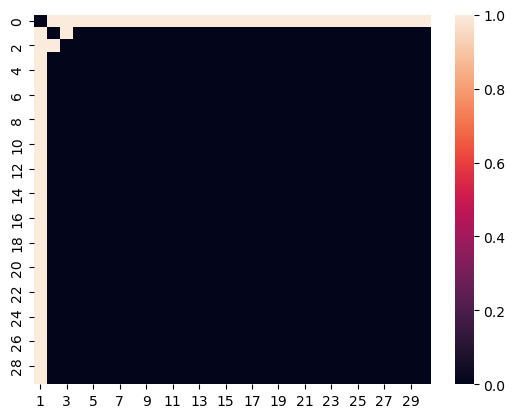

In [13]:
pvals = dict()

for i in deg_groups.keys():
    p_pairs = []
    for j in deg_groups.keys():
        sample1 = deg_groups[i]
        sample2 = deg_groups[j]
        p_pairs.append(stats.ks_2samp(sample1, sample2).pvalue)
    pvals[i] = p_pairs
            
results = pd.DataFrame(pvals)

# should always be a window, not daily
sns.heatmap(results < 0.05);

/var/folders/tv/psypbvx97n74gbz8rcln8f8m0000gn/T/ipykernel_2744/2942033518.py:8: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  p_pairs.append(stats.ks_2samp(sample1, sample2).pvalue)


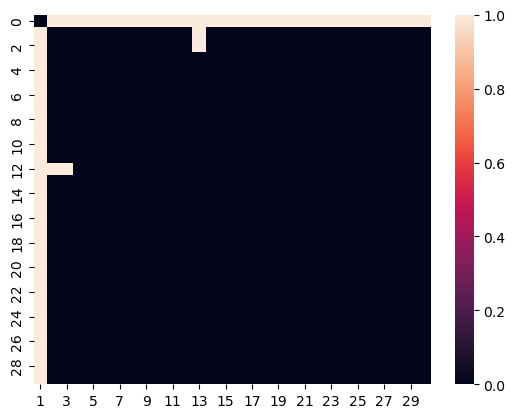

In [8]:
pvals = dict()

for i in betw_groups.keys():
    p_pairs = []
    for j in betw_groups.keys():
        sample1 = betw_groups[i]
        sample2 = betw_groups[j]
        p_pairs.append(stats.ks_2samp(sample1, sample2).pvalue)
    pvals[i] = p_pairs
            
results = pd.DataFrame(pvals)

# should always be a window, not daily
sns.heatmap(results < 0.05);

/var/folders/tv/psypbvx97n74gbz8rcln8f8m0000gn/T/ipykernel_2744/1380613032.py:8: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  p_pairs.append(stats.ks_2samp(sample1, sample2).pvalue)


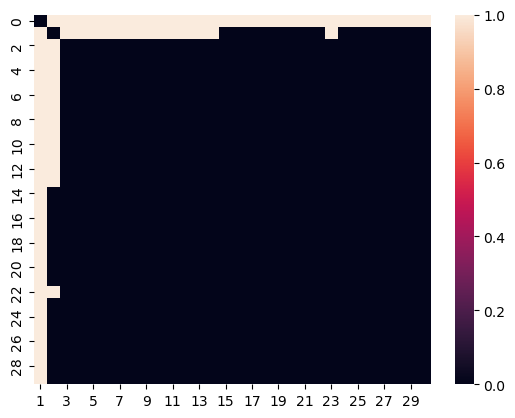

In [9]:
pvals = dict()

for i in clo_groups.keys():
    p_pairs = []
    for j in clo_groups.keys():
        sample1 = clo_groups[i]
        sample2 = clo_groups[j]
        p_pairs.append(stats.ks_2samp(sample1, sample2).pvalue)
    pvals[i] = p_pairs
            
results = pd.DataFrame(pvals)

# should always be a window, not daily
sns.heatmap(results < 0.05);

## distribution of clustering coefficients

In [10]:
conf = np.arange(1, 31)#[1, 7, 14, 30, 60, 90]

clus_coefs_groups = dict() 
for i in tqdm(conf):
#     n = date_scope - i + 2
#     print(i)
    n = int(date_scope // i)

    whole = ArticleEntityAnalysis(df)
    clus_coefs = whole.aggregate_rolling_window_analysis(
        function=average_weighted_clustering_coefficient,
        window_panel=n,
        intersect=i,
        mean=False,
        kind='entity')

    clus_coefs_groups[i] = clus_coefs

  0%|          | 0/30 [00:00<?, ?it/s]

/var/folders/tv/psypbvx97n74gbz8rcln8f8m0000gn/T/ipykernel_2744/566517448.py:8: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  p_pairs.append(stats.ks_2samp(sample1, sample2).pvalue)


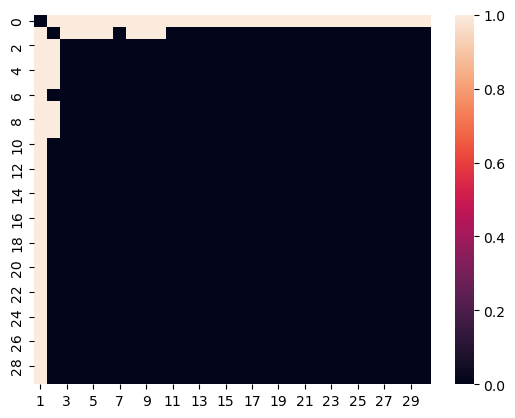

In [11]:
pvals = dict()

for i in clus_coefs_groups.keys():
    p_pairs = []
    for j in clus_coefs_groups.keys():
        sample1 = clus_coefs_groups[i]
        sample2 = clus_coefs_groups[j]
        p_pairs.append(stats.ks_2samp(sample1, sample2).pvalue)
    pvals[i] = p_pairs
            
results = pd.DataFrame(pvals)

# should always be a window, not daily
sns.heatmap(results < 0.05);

## plots for story

In [16]:
whole.element_rolling_window_degree_analysis(
    p=5,
    window_size=3,
    kind='entity',
    plot=True,
)

In [17]:
whole.element_rolling_window_degree_analysis(
    p=5,
    window_size=7,
    kind='entity',
    plot=True,
)

In [18]:
whole.element_rolling_window_degree_analysis(
    p=5,
    window_size=30,
    kind='entity',
    plot=True,
)